In [1]:
import qiskit
from qiskit.circuit.random import random_circuit
from qiskit.quantum_info import Operator
import random

### Generating random circuits

In [2]:
class CircuitInfo:
    def __init__(self, qc, resultant_unitary, gate_names):
        self.qc = qc
        self.resultant_unitary = resultant_unitary
        self.gate_names = gate_names

In [3]:
circuit_list = []

for _ in range(10):
    qc = random_circuit(1, random.randint(1, 20), measure=False)
    resultant_unitary = Operator(qc).data
    gate_names = [instruction.operation.name for instruction in qc.data]
    
    circuit_list.append(CircuitInfo(qc, resultant_unitary, gate_names))

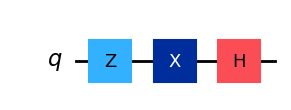

In [4]:
circuit_list[0].qc.draw(output='mpl')

In [5]:
circuit_list[0].resultant_unitary

array([[ 0.70710678+0.j, -0.70710678+0.j],
       [-0.70710678+0.j, -0.70710678+0.j]])

In [8]:
circuit_list[0].gate_names

['z', 'x', 'h']

### Performing Testing

In [2]:
import timeit
from functools import partial

from pyqasm.algorithms import solovay_kitaev
from pyqasm.maps.gates import BasisSet

In [3]:
import numpy as np

In [34]:
def measure_result_and_time(target_matrix_U, target_gate_set):
    result = solovay_kitaev(target_matrix_U, target_gate_set, depth=20)
    
    partial_func = partial(solovay_kitaev, target_matrix_U, target_gate_set, 20)
    avg_exc_time = timeit.timeit(partial_func, number=1)/1
    return result, avg_exc_time

In [35]:
def test_and_analyze_sk_algo(circuit_list, target_gate_set):
    for circuit in circuit_list:
        result, avg_exc_time = measure_result_and_time(circuit.resultant_unitary, target_gate_set)
        result_distance = np.linalg.norm(result.matrix - circuit.resultant_unitary, 2)
        
        print("------------------------------------------------")
        print(f"Execution time:     {avg_exc_time}")
        print(f"Circuit gates:      {circuit.gate_names}")
        print(f"Decomposed gates:   {result.name}")
        print(f"Distance:           {result_distance}")
        print(f"Is within accuracy: {result_distance < 1e-6}")
        print("Orignal resultant matrix:")
        print(circuit.resultant_unitary)
        print("Decomposed resultant unitary:")
        print(result.matrix)
        print("------------------------------------------------")

In [36]:
test_and_analyze_sk_algo(circuit_list, BasisSet.CLIFFORD_T)

------------------------------------------------
Execution time:     2.4317583000083687
Circuit gates:      ['z', 'x', 'h']
Decomposed gates:   ['t', 't', 't', 't', 'h', 't', 't', 's']
Distance:           2.7488925102312213e-16
Is within accuracy: True
Orignal resultant matrix:
[[ 0.70710678+0.j -0.70710678+0.j]
 [-0.70710678+0.j -0.70710678+0.j]]
Decomposed resultant unitary:
[[ 0.70710678+0.00000000e+00j -0.70710678+0.00000000e+00j]
 [-0.70710678-2.53429949e-17j -0.70710678-5.55111512e-17j]]
------------------------------------------------
------------------------------------------------
Execution time:     4.228998799997498
Circuit gates:      ['r', 'u1']
Decomposed gates:   ['h', 't', 't', 't', 't', 't', 's', 'h', 'sdg', 'tdg', 'tdg', 'tdg', 'tdg', 'tdg', 'h', 's', 's', 'h', 's', 's', 'h', 's', 's', 'h']
Distance:           0.4046729693889623
Is within accuracy: False
Orignal resultant matrix:
[[-0.8987577 +0.j         -0.31607208+0.30386352j]
 [-0.14188982-0.41485163j  0.79903828+